
# Regression model
# Relative location of CT slices on axial axis

 The data are available at:

 https://archive.ics.uci.edu/dataset/206/relative+location+of+ct+slices+on+axial+axis

The dataset consists of 384 features extracted from CT images. The class variable is numeric and denotes the relative location of the CT slice on the axial axis of the human body.

The data was retrieved from a set of 53500 CT images from 74 different patients (43 male, 31 female).

To exstract the data use the panda routines


In [1]:
import zipfile
import pandas as pd
 
# read the dataset using the compression zip
df = pd.read_csv('https://archive.ics.uci.edu/static/public/206/relative+location+of+ct+slices+on+axial+axis.zip',compression='zip')
 
# display dataset
print(df.head())

   patientId  value0  value1  value2  value3  value4  value5  value6  value7  \
0          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
1          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
2          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
3          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
4          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   

   value8  ...  value375  value376  value377  value378  value379  value380  \
0   -0.25  ...     -0.25  0.980381       0.0       0.0       0.0       0.0   
1   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
2   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
3   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
4   -0.25  ...     -0.25  0.976833       0.0       0.0       0.0       0.0   

   value381  value382  value383  reference  
0    

We transform the data to a matrix of shape 53500 x 386

In [2]:
Aall=df.to_numpy()
print(Aall.shape)

(53500, 386)


We add a column of all 1 and we organize the input data by dividing in test set and training set

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
#Add a column of ones at the beginning of the data matrix
Aall = np.column_stack([np.ones(Aall.shape[0]), Aall])
X = Aall
X=np.delete(X,386,1)
y = Aall[:,386]

Use the prepared data to solve the regression model with all the studied techniques.
Can we use the normal equation and the QR factorization? If the answer is positive compare the condition numbers of the QR methods and the normal equations. What are the results?


Use the funcation scipy.linalg.lstsq and check if all the lapack drivers works.
Compare the results changing the initial value cond. The results are the same? What about the execution time?

Analyze the singular values and check if it is possible to use a principal component regression procedure. Compute the solution using the singular value decomposition. 
Can you observe a relation in the chosen singular value and the value of cond of the routine lstsq?

Perform the same analysis by preprocessing the data in order to have data from a normal distribution with mean zero  and compute the singular value decomposition on this matrix.

Check the performance of the method by computing the least square residual for the training set and the testset. The minimum and the maximum values of the predicted error for both, the training set and the testset.

Compute the multiple R-squared: R2_train = 1 - sum( (y - yest)**2)/sum( (y-mean(y))**2 where y are the value to predict and yest are the estimated values for the training set.
Compute the value R2_test for the testset.

A value of R2 near one means that the constructed model is good.

Change the size of the training set and the testing set to 0.7% and 0.3% and repeat the previous steps.

Comment the obtained results.


<h1> Normal Equation </h1>
Normal equation is a method to solve the linear regression problem. It is based on the following formula: 

$$\theta = (X^T X)^{-1} X^T y$$

where $\theta$ is the vector of parameters, $X$ is the matrix of input data, and $y$ is the vector of output data. It is important to note that the matrix $X^TX$ must be full rank, otherwise the inverse of $X^T X$ does not exist, so the normal equation cannot be used.

In [4]:
def normalEquations(X_train, y_train, X_test, y_test):
    print("Rank of train data: ",np.linalg.matrix_rank(X_train.T@X_train))
    print("Shape of train data: ",(X_train.T @ X_train).shape)
    if np.linalg.matrix_rank(X_train.T@X_train)==X_train.shape[1]:
        theta=np.linalg.solve(X_train.T@X_train,X_train.T@y_train)
        y_train_pred=X_train@theta
        y_train_pred = X_train @ theta
        residuals_train = y_train - y_train_pred
        print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
        print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
        print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
        R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
        print("R2 for train set: ",R2_train)

        y_test_pred = X_test @ theta
        residuals_test = y_test - y_test_pred
        print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
        print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
        print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
        R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
        print("R2 for test set: ",R2_test)
    else:
        print("Matrix is singular")

<h1>QR factorization</h1>
The QR factorization can be used to solve the linear regression problem. It is based on the following formula:

$$
X = QR
$$

where $X$ is the matrix of input data, $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix. The solution of the linear regression problem is given by:

$$
\theta = R^{-1} Q^T y
$$

When $X$ is not full rank, we cannot use the QR factorization to solve the problem. We need to use the Pivot QR factorization, which is based on the following formula:

$$
XP = 
\begin{pmatrix}
Q_X & Q_X^\perp\\ 
\end{pmatrix}
\begin{pmatrix}
R_1 & R_2 \\
0 & 0 \\
\end{pmatrix}
$$

where $P$ is a permutation matrix. The solution of the linear regression problem is given by:

$$
\theta = P \begin{pmatrix} R_1^{-1} Q_X^T y \\ 0 \end{pmatrix}.
$$

In [5]:
import scipy.linalg as la
def QRsolver(X_train, y_train, X_test, y_test):
    rank=np.linalg.matrix_rank(X_train)
    #if rank not maximum
    if rank<X_train.shape[1]:
        Q,R,P = la.qr(X_train, pivoting=True, mode='economic') #economic -> Q is m x k, R is k x n where k=min(m,n)
        print("Condition number of QR factorization matrix: ",np.linalg.cond(R,2))
        #truncate R and Q to rank
        R_trunc = R[:rank, :rank]
        Q_trunc = Q[:, :rank]
        QTb = Q_trunc.T @ y_train
        theta_permuted=np.zeros(X_train.shape[1])
        theta_permuted [:rank]= la.solve_triangular(R_trunc, QTb) #store the solution in the first rank columns
        #restore original order
        theta = np.zeros_like(theta_permuted)
        theta[P] = theta_permuted #permute the elements of theta_permuted to get the solution
    else:
        Q,R=la.qr(X_train, mode='economic')
        R_trunc = R[:rank, :rank]
        Q_trunc = Q[:, :rank]
        QTb = Q_trunc.T @ y_train
        theta = la.solve_triangular(R_trunc, QTb)
    y_train_pred = X_train @ theta
    residuals_train = y_train - y_train_pred
    print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
    print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
    print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    print("R2 for train set: ",R2_train)

    y_test_pred = X_test @ theta
    residuals_test = y_test - y_test_pred
    print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
    print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
    print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    print("R2 for test set: ",R2_test)


<h1> SVD: Singular Value Decomposition </h1>

The Singular Value Decomposition (SVD) can also be used to solve the linear regression problem. It is based on the following formula:

$$
X = U \Sigma V^T
$$

where $X$ is the matrix of input data, $U$ is an orthogonal matrix, $\Sigma$ is a rectangular, and $V$ is an orthogonal matrix. The solution of the linear regression problem is given by:

$$
\theta = V_r D^{-1} U_r^T y
$$

where $V_r$ is the matrix containing the first r columns of $V$, $U_r$ is the matrix containing the first r columns of $U$, and $D$ is the diagonal matrix containing the first r singular values, which are the non-zeros one


In [6]:
def SVDSolver(X_train, y_train, X_test, y_test):
    rank = np.linalg.matrix_rank(X_train)
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False) #U and V are of size m x k and n x k, k=min(m,n) when full_matrices=False
    print("Rank of X_train: ",rank)
    print("Number of non zero singular values: ",np.count_nonzero(S))
    #S contains all singular values. If we consider only the non zero singular values, they should be equal to the rank of X_train. In this case this is not true, probably due to numerical errors.
    # I will use later the PCR and Euckardt-Young theorem to remove noise


    # So let's consider the first r=rank(X_train) singular values
    U_r = U[:, :rank]
    Vt_r = Vt[:rank, :]
    S_r = np.diag(S)[:rank, :rank]
    S_r_inv = np.linalg.inv(S_r)
    theta = Vt_r.T @ S_r_inv @ U_r.T @ y_train
    y_train_pred = X_train @ theta
    residuals_train = y_train - y_train_pred
    print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
    print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
    print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    print("R2 for train set: ",R2_train)

    y_test_pred = X_test @ theta
    residuals_test = y_test - y_test_pred
    print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
    print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
    print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    print("R2 for test set: ",R2_test)


<h1>Scipy.linalg.lstsq</h1>
The function scipy.linalg.lstsq is a method to solve the least squares problem. It uses different LAPACK drivers to solve the problem. The available drivers are:

1. **`gelsd`**:
   - **Description**: The `gelsd` driver solves the **least squares problem** using **Singular Value Decomposition (SVD)** and Divide-and-Conquer method.

2. **`gelsy`**:
   - **Description**: The `gelsy` driver solves the **least squares problem** using **QR decomposition with column pivoting**.
  

3. **`gelss`**:
   - **Description**:The `gelss` driver solves the **least squares problem** using **Singular Value Decomposition (SVD)**.

**Divide and conquer** is an optimization technique used to compute the **Singular Value Decomposition (SVD)** more efficiently.

- **Concept**: Divide and conquer breaks down the SVD problem into smaller, more manageable subproblems. Instead of performing the full SVD computation at once, the algorithm recursively divides the matrix into smaller parts and computes the decomposition in stages, merging results as it progresses.



In [7]:
import time
def lstsqSolver(X_train, y_train, X_test, y_test):
    conditions=[1e-1,1e-2,1e-4,1e-8,1e-12,1e-16]
    values={}
    for condition in conditions:
        #gelsd
        times=[]
        for i in range(5):
            start_time = time.time()
            theta_gelsd = la.lstsq(X_train, y_train,lapack_driver='gelsd',cond=condition)[0] #we took [0] because lstsq returns a tuple
            times.append(time.time()-start_time)
        
        values['driver']='gelsd'
        values['condition']=condition
        values['AVGtime']=np.mean(times)
        y_train_pred = X_train @ theta_gelsd
        residuals_train = y_train - y_train_pred
        values['residuals_train']=np.linalg.norm(residuals_train,2)
        values['Min error residuals_train']=np.min(np.abs(residuals_train))
        values['Max error residuals_train']=np.max(np.abs(residuals_train))
        R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
        values['R2_train']=R2_train
        y_test_pred = X_test @ theta_gelsd
        residuals_test = y_test - y_test_pred
        values['residuals_test']=np.linalg.norm(residuals_test,2)
        values['Min error residuals_test']=np.min(np.abs(residuals_test))
        values['Max error residuals_test']=np.max(np.abs(residuals_test))
        R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
        values['R2_test']=R2_test
        print(values)
        #gelss
        times=[]
        for i in range(5):
            start_time = time.time()
            theta_gelss = la.lstsq(X_train, y_train,lapack_driver='gelss',cond=condition)[0] #we took [0] because lstsq returns a tuple
            times.append(time.time()-start_time)
        values['driver']='gelss'
        values['condition']=condition
        values['AVGtime']=np.mean(times)
        y_train_pred = X_train @ theta_gelss
        residuals_train = y_train - y_train_pred
        values['residuals_train']=np.linalg.norm(residuals_train,2)
        values['Min error residuals_train']=np.min(np.abs(residuals_train))
        values['Max error residuals_train']=np.max(np.abs(residuals_train))
        R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
        values['R2_train']=R2_train
        y_test_pred = X_test @ theta_gelss
        residuals_test = y_test - y_test_pred
        values['residuals_test']=np.linalg.norm(residuals_test,2)
        values['Min error residuals_test']=np.min(np.abs(residuals_test))
        values['Max error residuals_test']=np.max(np.abs(residuals_test))
        R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
        values['R2_test']=R2_test
        print(values)
        #gelsy
        times=[]
        for i in range(5):
            start_time = time.time()
            theta_gelsy = la.lstsq(X_train, y_train,lapack_driver='gelsy',cond=condition)[0] #we took [0] because lstsq returns a tuple
            times.append(time.time()-start_time)
        values['driver']='gelsy'
        values['condition']=condition
        values['AVGtime']=np.mean(times)
        y_train_pred = X_train @ theta_gelsy
        residuals_train = y_train - y_train_pred
        values['residuals_train']=np.linalg.norm(residuals_train,2)
        values['Min error residuals_train']=np.min(np.abs(residuals_train))
        values['Max error residuals_train']=np.max(np.abs(residuals_train))
        R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
        values['R2_train']=R2_train
        y_test_pred = X_test @ theta_gelsy
        residuals_test = y_test - y_test_pred
        values['residuals_test']=np.linalg.norm(residuals_test,2)
        values['Min error residuals_test']=np.min(np.abs(residuals_test))
        values['Max error residuals_test']=np.max(np.abs(residuals_test))
        R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
        values['R2_test']=R2_test
        print(values)

<h1> PCR: Principal Component Regression </h1>

PCR can be used to solve the linear regression problem. It is based on the following formula:

$$
X_k = U_k \Sigma_k V_k^T
$$

where $X_k$ is an approximation of the matrix of input data, $U_k$ contains the first k columns of $U$, $\Sigma_k$ contains the first k singular values, and $V_k$ contains the first k columns of $V$.

The problem is to find the best value of k. There are several methods that we can use like:


1. **Mixed Error**: We can use the mixed error to find the best value of k. The criterion is based on the following formula:

$$
\frac{\|X - X_k\|_2}{\|X\|_2+1} = \frac{\sigma_{k+1}}{\sigma_1 + 1} \leq \text{tol}
$$

When we find k+1 so that the criterion is satisfied, we can use k as the best value of k.

2. **Scree Plot**: We can use the scree plot to find the best value of k. The scree plot shows the singular values in decreasing order. We can find the best value of k by looking at the point where the curve starts to flatten.

3. **Cumulative Percentage of Variance**: We can use the cumulative percentage of variance to find the best value of k. The cumulative percentage of variance is given by:

$$
\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^r \sigma_i^2} >= \text{p}
$$
where p is the percentage of variance that we want to explain between 0 and 1.
When we find k so that the criterion is satisfied, we can use k as the best value of k.

In [8]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

def PCRSolver(X_train, y_train, X_test, y_test):
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
    #1: mixed error criterion
    tol=1e-6
    k=np.argmax(S/(S[0]+1)<tol)-1  #argmax returns the first occurrence of the that satisfies the condition and this is k+1
    print("k=",k," with mixed error criterion and tol=",tol)
    print("Sigma_k=",S[k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    S_k = np.diag(S)[:k, :k]
    S_k_inv = np.linalg.inv(S_k)
    theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
    y_train_pred = X_train @ theta
    residuals_train = y_train - y_train_pred
    print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
    print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
    print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    print("R2 for train set: ",R2_train)

    y_test_pred = X_test @ theta
    residuals_test = y_test - y_test_pred
    print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
    print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
    print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    print("R2 for test set: ",R2_test)







    #2: Scree Plot

    k1 = KneeLocator(range(len(S)), S, curve='convex', direction='decreasing')
    plt.plot(range(len(S)), S)
    plt.scatter(k1.elbow, S[k1.elbow], c='red', s=100, alpha=0.5)
    plt.xlabel('Singular value index')
    plt.ylabel('Singular value')
    plt.title('Scree plot')
    plt.legend(['Singular values', 'Elbow'])
    plt.show()
    k=k1.elbow
    print("k=",k," with Screep plot")
    print("Sigma_k=",S[k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    S_k = np.diag(S)[:k, :k]
    S_k_inv = np.linalg.inv(S_k)
    theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
    y_train_pred = X_train @ theta
    residuals_train = y_train - y_train_pred
    print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
    print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
    print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    print("R2 for train set: ",R2_train)

    y_test_pred = X_test @ theta
    residuals_test = y_test - y_test_pred
    print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
    print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
    print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    print("R2 for test set: ",R2_test)


    #3: Cumulative percentage of variance
    p=0.99
    total_sum=np.sum(S**2)
    cumulative_sum=np.cumsum(S**2)
    k=np.argmax((cumulative_sum/total_sum)>p)
    print("k=",k,"with cumulative percentage of variance and p=",p)
    print("Sigma_k=",S[k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    S_k = np.diag(S)[:k, :k]
    S_k_inv = np.linalg.inv(S_k)
    theta = Vt_k.T @ S_k_inv @ U_k.T @ y_train
    y_train_pred = X_train @ theta
    residuals_train = y_train - y_train_pred
    print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
    print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
    print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
    R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
    print("R2 for train set: ",R2_train)

    y_test_pred = X_test @ theta
    residuals_test = y_test - y_test_pred
    print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
    print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
    print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
    R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
    print("R2 for test set: ",R2_test)




NORMAL EQUATIONS
Rank of train data:  375
Shape of train data:  (386, 386)
Matrix is singular

QR SOLVER
Condition number of QR factorization matrix:  2.4463550697566203e+32
Residuals for train set:  1798.3737270942406
Maximum error for train set:  49.47129163028276
Minimum error for train set:  1.4352963262354024e-12
R2 for train set:  0.8653831545119198
Residuals for test set:  613.1967475658972
Maximum error for test set:  46.98621458423358
Minimum error for test set:  0.0023313738117138882
R2 for test set:  0.8603214800189586

SVD SOLVER
Rank of X_train:  375
Number of non zero singular values:  386
Residuals for train set:  1798.3737270942406
Maximum error for train set:  49.47129163028183
Minimum error for train set:  5.613287612504791e-13
R2 for train set:  0.8653831545119198
Residuals for test set:  613.1967475658979
Maximum error for test set:  46.98621458423264
Minimum error for test set:  0.0023313738110175564
R2 for test set:  0.8603214800189583

LSTSQ SOLVER
{'driver': 'g

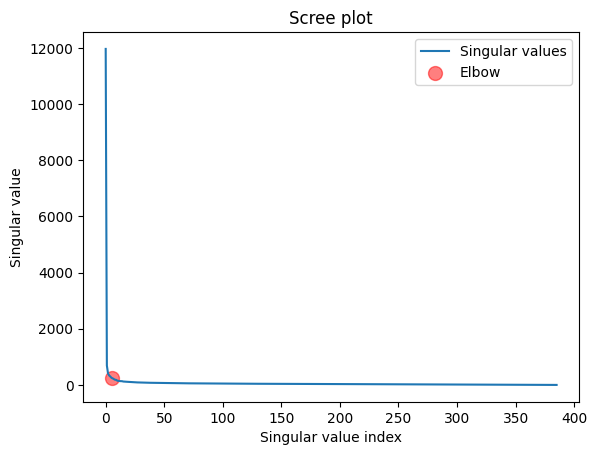

k= 5  with Screep plot
Sigma_k= 250.9209568227013
Residuals for train set:  4314.872172761188
Maximum error for train set:  81.8056017452396
Minimum error for train set:  4.238081472607291e-05
R2 for train set:  0.22504697175187627
Residuals for test set:  1430.3535335393976
Maximum error for test set:  72.85619426228541
Minimum error for test set:  0.004824564473430826
R2 for test set:  0.23999451660000515
k= 1 with cumulative percentage of variance and p= 0.99
Sigma_k= 688.74133812504
Residuals for train set:  7079.00332556767
Maximum error for train set:  86.12879856814982
Minimum error for train set:  0.00016317329874482311
R2 for train set:  -1.085853217608597
Residuals for test set:  2361.142356336503
Maximum error for test set:  86.21332456608174
Minimum error for test set:  0.0015384355101133451
R2 for test set:  -1.0709722681710114


In [45]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .9,
    test_size = .1,
    random_state = 5,
    shuffle = True
)
print("\nNORMAL EQUATIONS")
normalEquations(X_train, y_train, X_test, y_test)
print("\nQR SOLVER")
QRsolver(X_train, y_train, X_test, y_test)
print("\nSVD SOLVER")
SVDSolver(X_train, y_train, X_test, y_test)
print("\nLSTSQ SOLVER")
lstsqSolver(X_train, y_train, X_test, y_test)
print("\nPCR SOLVER")
PCRSolver(X_train, y_train, X_test, y_test)


<h1> NOW WE CHANGE THE PERCENTAGE OF THE TRAINING SET AND THE TESTING SET </h1>


NORMAL EQUATIONS
Rank of train data:  374
Shape of train data:  (386, 386)
Matrix is singular

QR SOLVER
Condition number of QR factorization matrix:  2.4045944568960685e+32
Residuals for train set:  1581.8224079089453
Maximum error for train set:  49.31879889962844
Minimum error for train set:  3.197442310920451e-14
R2 for train set:  0.8663961504183206
Residuals for test set:  1056.7495138518016
Maximum error for test set:  46.86165824234786
Minimum error for test set:  0.0005819565929527926
R2 for test set:  0.8602025218438263

SVD SOLVER
Rank of X_train:  374
Number of non zero singular values:  386
Residuals for train set:  1581.822407908945
Maximum error for train set:  49.31879889962739
Minimum error for train set:  4.973799150320701e-13
R2 for train set:  0.8663961504183206
Residuals for test set:  1056.7516844256186
Maximum error for test set:  46.86165824234698
Minimum error for test set:  0.0005819565922635661
R2 for test set:  0.8602019475524668

LSTSQ SOLVER
{'driver': 'g

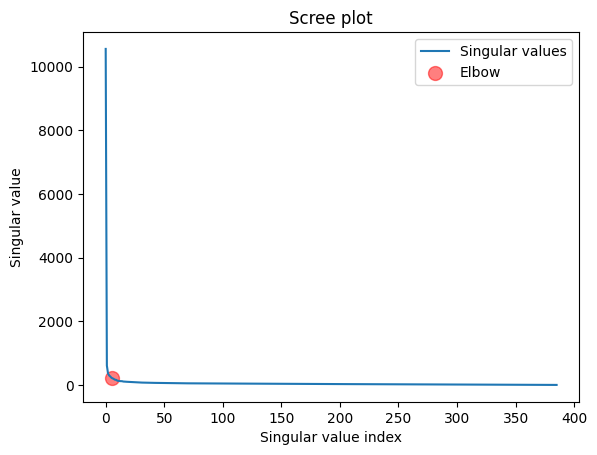

k= 5  with Screep plot
Sigma_k= 221.56058987580698
Residuals for train set:  3827.891659917939
Maximum error for train set:  77.98276634172981
Minimum error for train set:  0.0007443352258604818
R2 for train set:  0.21761088436209697
Residuals for test set:  2501.375548893731
Maximum error for test set:  82.1296511792311
Minimum error for test set:  0.0006695430814858128
R2 for test set:  0.21672723822862605
k= 1 with cumulative percentage of variance and p= 0.99
Sigma_k= 606.6409563436413
Residuals for train set:  6242.025534840823
Maximum error for train set:  86.14804612741864
Minimum error for train set:  0.0017990607773654688
R2 for train set:  -1.080437181562219
Residuals for test set:  4089.558851795378
Maximum error for test set:  86.23257111283189
Minimum error for test set:  0.001906573612053819
R2 for test set:  -1.093669606479018


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .7,
    test_size = .3,
    random_state = 5,
    shuffle = True
)

print("\nNORMAL EQUATIONS")
normalEquations(X_train, y_train, X_test, y_test)
print("\nQR SOLVER")
QRsolver(X_train, y_train, X_test, y_test)
print("\nSVD SOLVER")
SVDSolver(X_train, y_train, X_test, y_test)
print("\nLSTSQ SOLVER")
lstsqSolver(X_train, y_train, X_test, y_test)
print("\nPCR SOLVER")
PCRSolver(X_train, y_train, X_test, y_test)

<h1> Mean 0</h1>
<h4> Train set 0.9 and test set 0.1 </h4>


NORMAL EQUATIONS
Rank of train data:  374
Shape of train data:  (386, 386)
Matrix is singular

QR SOLVER
Condition number of QR factorization matrix:  inf
Residuals for train set:  1798.375168923055
Maximum error for train set:  49.48141087921306
Minimum error for train set:  0.00010451105330844257
R2 for train set:  0.8653829386563148
Residuals for test set:  613.1883250084952
Maximum error for test set:  46.99654288414338
Minimum error for test set:  0.0006169212601747631
R2 for test set:  0.8603253170982564

SVD SOLVER
Rank of X_train:  374
Number of non zero singular values:  386
Residuals for train set:  1798.375168923055
Maximum error for train set:  49.48141087921296
Minimum error for train set:  0.00010451105312370146
R2 for train set:  0.8653829386563148
Residuals for test set:  613.1883250084953
Maximum error for test set:  46.99654288414334
Minimum error for test set:  0.0006169212603666097
R2 for test set:  0.8603253170982563

LSTSQ SOLVER
{'driver': 'gelsd', 'condition': 

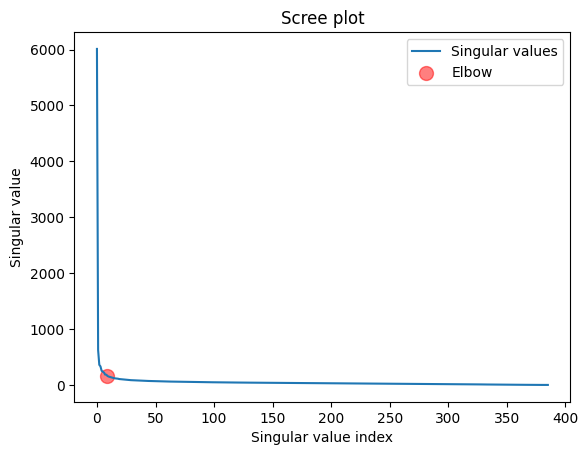

k= 9  with Screep plot
Sigma_k= 160.0371010848383
Residuals for train set:  2834.123989129834
Maximum error for train set:  53.56869903518497
Minimum error for train set:  6.0258639919652524e-05
R2 for train set:  0.6656685720463946
Residuals for test set:  942.4515117574208
Maximum error for test set:  53.68821132157274
Minimum error for test set:  0.005007439769400435
R2 for test set:  0.6700501235002101
k= 46 with cumulative percentage of variance and p= 0.99
Sigma_k= 69.20495430475549
Residuals for train set:  2135.767310283201
Maximum error for train set:  50.95697458632548
Minimum error for train set:  0.00013314212461068564
R2 for train set:  0.810133921331676
Residuals for test set:  709.0843727595702
Maximum error for test set:  48.38086047422813
Minimum error for test set:  0.001812555850200681
R2 for test set:  0.8132219797565957


In [9]:
X = X - np.mean(X, axis=0)
y=y-np.mean(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .9,
    test_size = .1,
    random_state = 5,
    shuffle = True
)

print("\nNORMAL EQUATIONS")
normalEquations(X_train, y_train, X_test, y_test)
print("\nQR SOLVER")
QRsolver(X_train, y_train, X_test, y_test)
print("\nSVD SOLVER")
SVDSolver(X_train, y_train, X_test, y_test)
print("\nLSTSQ SOLVER")
lstsqSolver(X_train, y_train, X_test, y_test)
print("\nPCR SOLVER")
PCRSolver(X_train, y_train, X_test, y_test)

CHANGE DATASET DIMENSION


NORMAL EQUATIONS
Rank of train data:  373
Shape of train data:  (386, 386)
Matrix is singular

QR SOLVER
Condition number of QR factorization matrix:  inf
Residuals for train set:  1581.8224079089448
Maximum error for train set:  49.31879889963359
Minimum error for train set:  3.1938895972416503e-12
R2 for train set:  0.8663961504183206
Residuals for test set:  24323.803995926748
Maximum error for test set:  17502.659908336667
Minimum error for test set:  0.0005819565969105156
R2 for test set:  -73.06588457680839

SVD SOLVER
Rank of X_train:  374
Number of non zero singular values:  386
Residuals for train set:  1581.8224079089446
Maximum error for train set:  49.318798899683344
Minimum error for train set:  3.9126035744629917e-11
R2 for train set:  0.8663961504183207
Residuals for test set:  24323.80398699717
Maximum error for test set:  17502.659901901887
Minimum error for test set:  0.0005819565577045438
R2 for test set:  -73.06588452242733

LSTSQ SOLVER
{'driver': 'gelsd', 'condit

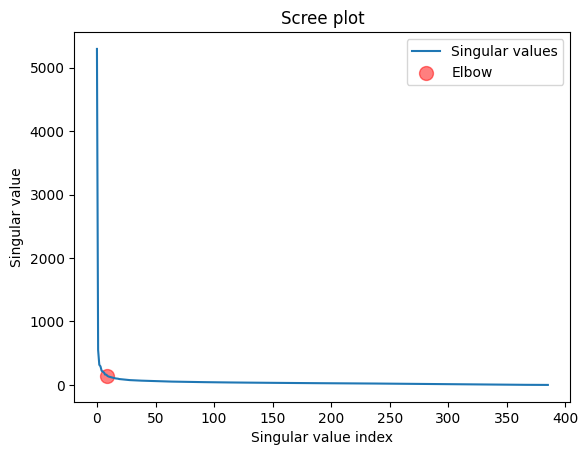

k= 9  with Screep plot
Sigma_k= 141.26352434443368
Residuals for train set:  2497.332145821892
Maximum error for train set:  53.68137331724654
Minimum error for train set:  0.0001362779641826961
R2 for train set:  0.6669908704885368
Residuals for test set:  1637.0185070544176
Maximum error for test set:  53.81545195900935
Minimum error for test set:  0.0005248476698405113
R2 for test set:  0.6645232691281926
k= 46 with cumulative percentage of variance and p= 0.99
Sigma_k= 61.22165898458327
Residuals for train set:  1883.4871974261753
Maximum error for train set:  50.84759004578369
Minimum error for train set:  0.00034606460312680554
R2 for train set:  0.8105786750485895
Residuals for test set:  1233.3201425743985
Maximum error for test set:  51.03784522031048
Minimum error for test set:  0.0009238708125600681
R2 for test set:  0.8095824940245349


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.7,
    test_size = .3,
    random_state = 5,
    shuffle = True
)

print("\nNORMAL EQUATIONS")
normalEquations(X_train, y_train, X_test, y_test)
print("\nQR SOLVER")
QRsolver(X_train, y_train, X_test, y_test)
print("\nSVD SOLVER")
SVDSolver(X_train, y_train, X_test, y_test)
print("\nLSTSQ SOLVER")
lstsqSolver(X_train, y_train, X_test, y_test)
print("\nPCR SOLVER")
PCRSolver(X_train, y_train, X_test, y_test)

<h1> RESULTS </h1>

For a setted configuration of the training set and the testing set, we have the following results:

1. **Normal Equation**: The normal equation cannot be used because the matrix $X^T X$ is not full rank.
2. **QR Factorization**: The QR factorization cannot be used because the matrix $X$ is not full rank, so we use the Pivot QR factorization.
3. **SVD**: The SVD can be used to solve the linear regression problem. SVD and QR factorization have almost the same results
4. **Scipy.linalg.lstsq**: We can notice that, decreasing the value of cond, the residual error decreases as the errors and R2. Regarding the execution time, we can notiche that in general the gelsy driver is slower than the other two. The execution time tends to increase with the decrease of the value of cond. At the beginning, gelsy performs worse than the other two, but as the value of cond decreases, the execution time of gelsy becomes closer to the other two drivers.
5. **PCR**: When the value of the last singular values increas, the error gets worse. This happens also for the cond number in ltsq

<h2>Comparison between the different configurations:</h2>
<h3> QR </h3>

| Train Set | Data Centering | Solver | R2 Train | R2 Test | Res Train | Res Test | Max Err Train | Min Err Train | Max Err Test | Min Err Test |
| :-------- | :------------- | :----- | :------- | :------ | :-------- | :------- | :------------ | :------------ | :----------- | :----------- |
| 90%       | No             | QR     | 0.865    | 0.860   | 1798.37   | 613.19   | 49.47         | 1.43e-12      | 46.98        | 0.002        |
| 70%       | No             | QR     | 0.866    | 0.860   | 1581.82   | 1056.74  | 49.31         | 3.19e-14      | 46.86        | 0.0006        |
| 90%       | Yes            | QR     | 0.865    | 0.860   | 1798.37   | 613.18   | 49.48         | 0.0001        | 46.99        | 0.0006       |
| 70%       | Yes            | QR     | 0.866    | -73.065   | 1581.82   | 24323.80  | 49.31         | 3.19e-12      | 17502.65        | 0.0006        |

For the QR method, we can see that for the train set results are very similar, we have better result with less data in the training set with an improvement when the data is centered.
For the test set we have better results with more data in the training set. The last configuration is the worst one, with a very high error in the test set.



<h3> SVD </h3>

| Train Set | Data Centering | Solver | R2 Train | R2 Test | Res Train | Res Test | Max Err Train | Min Err Train | Max Err Test | Min Err Test |
| :-------- | :------------- | :----- | :------- | :------ | :-------- | :------- | :------------ | :------------ | :----------- | :----------- |
| 90%       | No             | SVD     | 0.865    | 0.860   | 1798.37   | 613.19   | 49.47         | 5.61e-13      | 46.98        | 0.002        |
| 70%       | No             | SVD     | 0.866    | 0.860   | 1581.82   | 1056.74  | 49.31         | 3.19e-14      | 46.86        | 0.0006        |
| 90%       | Yes            | SVD     | 0.865    | 0.860   | 1798.37   | 613.18   | 49.48         | 0.0001        | 46.99        | 0.0006       |
| 70%       | Yes            | SVD     | 0.866    | -73.065   | 1581.82   | 24323.80  | 49.31         | 3.19e-11      | 17502.65        | 0.0006        |

For the SVD method, we can see that for the train set results are very similar, we have better result with less data in the training set with an improvement when the data is centered.
For the test set we have better results with more data in the training set. The last configuration is the worst one, with a very high error in the test set.


<h3> PCR </h3>

| Train Set | Data Centering | Solver | Condition                       | R2 Train | R2 Test | Res Train | Res Test | Max Err Train | Min Err Train | Max Err Test | Min Err Test | Sigma_k | k   |
| :-------- | :------------- | :----- | :------------------------------ | :------- | :------ | :-------- | :------- | :------------ | :------------ | :----------- | :----------- | :------ | :-- |
| 90%       | No             | PCR    | mixed error criterion, tol=1e-06 | 0.865    | 0.860   | 1798.37   | 613.19   | 49.47         | 8.88e-06      | 46.98        | 0.002        | 0.242   | 374 |
| 90%       | No             | PCR    | Scree plot                      | 0.225    | 0.239   | 4314.87   | 1430.35  | 81.80         | 4.23e-05      | 72.85        | 0.004        | 250.92  | 5   |
| 90%       | No             | PCR    | cumulative variance, p=0.99     | -1.085   | -1.070  | 7079.00   | 2361.14  | 86.12         | 0.0001        | 86.21        | 0.001        | 688.74  | 1   |
| 70%       | No             | PCR    | mixed error criterion, tol=1e-06 | 0.866    | 0.860   | 1581.82   | 1056.75  | 49.31         | 1.03e-05      | 46.86        | 0.0005        | 0.241   | 373 |
| 70%       | No             | PCR    | Scree plot                      | 0.217    | 0.216   | 3827.89   | 2501.37  | 77.98         | 0.0007         | 82.12        | 0.0006        | 221.56  | 5   |
| 70%       | No             | PCR    | cumulative variance, p=0.99     | -1.080   | -1.093  | 6242.02   | 4089.55  | 86.14         | 0.001         | 86.23        | 0.001        | 606.64  | 1   |
| 90%       | Yes            | PCR    | mixed error criterion, tol=1e-06 | 0.865    | 0.860   | 1798.37   | 613.18   | 49.48         | 6.08e-05      | 46.99        | 0.00028        | 0.248   | 373 |
| 90%       | Yes            | PCR    | Scree plot                      | 0.665    | 0.670   | 2834.12   | 942.45   | 53.56         | 6.02e-05      | 53.68        | 0.005        | 160.03  | 9   |
| 90%       | Yes            | PCR    | cumulative variance, p=0.99     | 0.810    | 0.813   | 2135.76   | 709.08   | 50.95         | 0.0001         | 48.38        | 0.001        | 69.20   | 46  |
| 70%       | Yes            | PCR    | mixed error criterion, tol=1e-06 | 0.866    | 0.860   | 1581.82   | 1056.74  | 49.30         | 0.0008         | 46.85        | 6.5e-5        | 0.247   | 372 |
| 70%       | Yes            | PCR    | Scree plot                      | 0.666    | 0.664   | 2497.33   | 1637.081  | 53.68         | 0.0001        | 53.81        | 0.0005       | 141.26  | 9   |
| 70%       | Yes            | PCR    | cumulative variance, p=0.99     | 0.810    | 0.809   | 1883.48   | 1233.32  | 50.84         | 0.0003         | 51.03        | 0.0009        | 61.22   | 46  |


We can notice that in general the best criterion is the first one, of course because it takes more singular_values, so the approximation is better. 
When we center our data we get better results

<h3> LSTSQ </h3>

| Train Set | Data Centering | Solver          | Condition | R2 Train | R2 Test | Res Train | Res Test | Max Err Train | Min Err Train | Max Err Test | Min Err Test | AVGtime |
| :-------- | :------------- | :-------------- | :-------- | :------- | :------ | :-------- | :------- | :------------ | :------------ | :----------- | :----------- | :------ |
| 90%       | No             | LSTSQ (gelsd)   | 0.1       | -1.08585 | -1.07097 | 7079.00333 | 2361.14236 | 86.12880    | 0.00016     | 86.21332    | 0.00154     | 1.77860   |
| 90%       | No             | LSTSQ (gelsd)   | 0.01      | 0.66139  | 0.66675  | 2852.20918 | 947.15672  | 59.94904    | 0.00018     | 57.95974    | 0.00234     | 1.56410   |
| 90%       | No             | LSTSQ (gelsd)   | 0.0001    | 0.86538  | 0.86033  | 1798.39947 | 613.17157  | 49.47573    | 0.00002     | 46.98915    | 0.00144     | 1.56109   |
| 90%       | No             | LSTSQ (gelsd)   | 1e-08     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.56903   |
| 90%       | No             | LSTSQ (gelsd)   | 1e-12     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.57846   |
| 90%       | No             | LSTSQ (gelsd)   | 1e-16     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.66324   |
| 70%       | No             | LSTSQ (gelsd)   | 0.1       | -1.08044 | -1.09367 | 6242.02553 | 4089.55885 | 86.14805    | 0.00179     | 86.23257    | 0.00191     | 1.46380   |
| 70%       | No             | LSTSQ (gelsd)   | 0.01      | 0.65964  | 0.65743  | 2524.74049 | 1654.23521 | 59.87020    | 0.00049     | 59.98093    | 0.00040     | 1.31738   |
| 70%       | No             | LSTSQ (gelsd)   | 0.0001    | 0.86639  | 0.86020  | 1581.84377 | 1056.75988 | 49.31676    | 0.00076     | 46.85915    | 0.00052     | 1.30473   |
| 70%       | No             | LSTSQ (gelsd)   | 1e-08     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.29892   |
| 70%       | No             | LSTSQ (gelsd)   | 1e-12     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.31234   |
| 70%       | No             | LSTSQ (gelsd)   | 1e-16     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.30712   |
| 90%       | Yes            | LSTSQ (gelsd)   | 0.1       | 0.05866  | 0.06325  | 4755.57057 | 1587.99024 | 50.36097    | 0.00026     | 50.13814    | 0.00127     | 1.78491   |
| 90%       | Yes            | LSTSQ (gelsd)   | 0.01      | 0.81501  | 0.81636  | 2108.13733 | 703.10958  | 50.16159    | 0.00014     | 45.97968    | 0.00037     | 1.81468   |
| 90%       | Yes            | LSTSQ (gelsd)   | 0.0001    | 0.86538  | 0.86033  | 1798.38203 | 613.18893  | 49.48069    | 0.00007     | 46.99557    | 0.00136     | 1.74199   |
| 90%       | Yes            | LSTSQ (gelsd)   | 1e-08     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.70985   |
| 90%       | Yes            | LSTSQ (gelsd)   | 1e-12     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.68966   |
| 90%       | Yes            | LSTSQ (gelsd)   | 1e-16     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.66917   |
| 70%       | Yes            | LSTSQ (gelsd)   | 0.1       | 0.05819  | 0.06148  | 4199.81347 | 2738.06498 | 50.34529    | 0.00078     | 50.23111    | 0.00174     | 1.30449   |
| 70%       | Yes            | LSTSQ (gelsd)   | 0.01      | 0.81601  | 0.81415  | 1856.29786 | 1218.44217 | 50.37108    | 0.00006     | 49.17413    | 0.00024     | 1.38629   |
| 70%       | Yes            | LSTSQ (gelsd)   | 0.0001    | 0.86639  | 0.86020  | 1581.83097 | 1056.74796 | 49.30710    | 0.00109     | 46.84895    | 0.00040     | 1.45141   |
| 70%       | Yes            | LSTSQ (gelsd)   | 1e-08     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 1.57744   |
| 70%       | Yes            | LSTSQ (gelsd)   | 1e-12     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 1.70760   |
| 70%       | Yes            | LSTSQ (gelsd)   | 1e-16     | 0.86640  | -52.94615 | 1581.82302 | 20758.81848 | 49.31083    | 0.00010     | 14933.18677 | 0.00105     | 1.63967   |
| 90%       | No             | LSTSQ (gelss)   | 0.1       | -1.08585 | -1.07097 | 7079.00333 | 2361.14236 | 86.12880    | 0.00016     | 86.21332    | 0.00154     | 1.73561   |
| 90%       | No             | LSTSQ (gelss)   | 0.01      | 0.66139  | 0.66675  | 2852.20918 | 947.15672  | 59.94904    | 0.00018     | 57.95974    | 0.00234     | 1.64774   |
| 90%       | No             | LSTSQ (gelss)   | 0.0001    | 0.86538  | 0.86033  | 1798.39947 | 613.17157  | 49.47573    | 0.00002     | 46.98915    | 0.00144     | 1.64751   |
| 90%       | No             | LSTSQ (gelss)   | 1e-08     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.63350   |
| 90%       | No             | LSTSQ (gelss)   | 1e-12     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.68094   |
| 90%       | No             | LSTSQ (gelss)   | 1e-16     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 1.74813   |
| 70%       | No             | LSTSQ (gelss)   | 0.1       | -1.08044 | -1.09367 | 6242.02553 | 4089.55885 | 86.14805    | 0.00179     | 86.23257    | 0.00191     | 1.59297   |
| 70%       | No             | LSTSQ (gelss)   | 0.01      | 0.65964  | 0.65743  | 2524.74049 | 1654.23521 | 59.87020    | 0.00049     | 59.98093    | 0.00040     | 1.61452   |
| 70%       | No             | LSTSQ (gelss)   | 0.0001    | 0.86639  | 0.86020  | 1581.84377 | 1056.75988 | 49.31676    | 0.00076     | 46.85915    | 0.00052     | 1.63310   |
| 70%       | No             | LSTSQ (gelss)   | 1e-08     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.61389   |
| 70%       | No             | LSTSQ (gelss)   | 1e-12     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.61434   |
| 70%       | No             | LSTSQ (gelss)   | 1e-16     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 1.60591   |
| 90%       | Yes            | LSTSQ (gelss)   | 0.1       | 0.05866  | 0.06325  | 4755.57057 | 1587.99024 | 50.36097    | 0.00026     | 50.13814    | 0.00127     | 1.94543   |
| 90%       | Yes            | LSTSQ (gelss)   | 0.01      | 0.81501  | 0.81636  | 2108.13733 | 703.10958  | 50.16159    | 0.00014     | 45.97968    | 0.00037     | 2.11009   |
| 90%       | Yes            | LSTSQ (gelss)   | 0.0001    | 0.86538  | 0.86033  | 1798.38203 | 613.18893  | 49.48069    | 0.00007     | 46.99557    | 0.00136     | 1.73298   |
| 90%       | Yes            | LSTSQ (gelss)   | 1e-08     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.77464   |
| 90%       | Yes            | LSTSQ (gelss)   | 1e-12     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.75706   |
| 90%       | Yes            | LSTSQ (gelss)   | 1e-16     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 1.71219   |
| 70%       | Yes            | LSTSQ (gelss)   | 0.1       | 0.05819  | 0.06148  | 4199.81347 | 2738.06498 | 50.34529    | 0.00078     | 50.23111    | 0.00174     | 1.82730   |
| 70%       | Yes            | LSTSQ (gelss)   | 0.01      | 0.81601  | 0.81415  | 1856.29786 | 1218.44217 | 50.37108    | 0.00006     | 49.17413    | 0.00024     | 1.77179   |
| 70%       | Yes            | LSTSQ (gelss)   | 0.0001    | 0.86639  | 0.86020  | 1581.83097 | 1056.74796 | 49.30710    | 0.00109     | 46.84895    | 0.00040     | 2.02819   |
| 70%       | Yes            | LSTSQ (gelss)   | 1e-08     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.30481   |
| 70%       | Yes            | LSTSQ (gelss)   | 1e-12     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.10424   |
| 70%       | Yes            | LSTSQ (gelss)   | 1e-16     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.28967   |
| 90%       | No             | LSTSQ (gelsy)   | 0.1       | -1.08587 | -1.07093 | 7079.03005 | 2361.11959 | 86.13956    | 0.00110     | 86.22409    | 0.00349     | 2.61910   |
| 90%       | No             | LSTSQ (gelsy)   | 0.01      | -1.08587 | -1.07093 | 7079.03005 | 2361.11959 | 86.13956    | 0.00110     | 86.22409    | 0.00349     | 2.62490   |
| 90%       | No             | LSTSQ (gelsy)   | 0.0001    | 0.86538  | 0.86032  | 1798.38823 | 613.19484  | 49.47471    | 0.00009     | 46.98724    | 0.00066     | 2.64965   |
| 90%       | No             | LSTSQ (gelsy)   | 1e-08     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 2.63641   |
| 90%       | No             | LSTSQ (gelsy)   | 1e-12     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 2.63356   |
| 90%       | No             | LSTSQ (gelsy)   | 1e-16     | 0.86538  | 0.86032  | 1798.37373 | 613.19675  | 49.47129    | 0.00000     | 46.98621    | 0.00233     | 2.67458   |
| 70%       | No             | LSTSQ (gelsy)   | 0.1       | -1.08045 | -1.09370 | 6242.04876 | 4089.59168 | 86.15872    | 0.00019     | 86.24325    | 0.00512     | 2.05476   |
| 70%       | No             | LSTSQ (gelsy)   | 0.01      | -1.08045 | -1.09370 | 6242.04876 | 4089.59168 | 86.15872    | 0.00019     | 86.24325    | 0.00512     | 2.11206   |
| 70%       | No             | LSTSQ (gelsy)   | 0.0001    | 0.86639  | 0.86020  | 1581.84581 | 1056.76218 | 49.31417    | 0.00028     | 46.85882    | 0.00027     | 2.06237   |
| 70%       | No             | LSTSQ (gelsy)   | 1e-08     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 2.06166   |
| 70%       | No             | LSTSQ (gelsy)   | 1e-12     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 2.07668   |
| 70%       | No             | LSTSQ (gelsy)   | 1e-16     | 0.86640  | 0.86020  | 1581.82241 | 1056.75168 | 49.31880    | 0.00000     | 46.86166    | 0.00058     | 2.08682   |
| 90%       | Yes            | LSTSQ (gelsy)   | 0.1       | 0.00028  | 0.00025  | 4900.82883 | 1640.51420 | 50.81533    | 0.00036     | 50.89982    | 0.00037     | 2.79490   |
| 90%       | Yes            | LSTSQ (gelsy)   | 0.01      | 0.73562  | 0.73877  | 2520.24054 | 838.57833  | 47.27200    | 0.00001     | 45.74035    | 0.00051     | 3.01653   |
| 90%       | Yes            | LSTSQ (gelsy)   | 0.0001    | 0.86538  | 0.86033  | 1798.38205 | 613.18780  | 49.48074    | 0.00024     | 46.99563    | 0.00141     | 2.77799   |
| 90%       | Yes            | LSTSQ (gelsy)   | 1e-08     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 2.72034   |
| 90%       | Yes            | LSTSQ (gelsy)   | 1e-12     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 2.71030   |
| 90%       | Yes            | LSTSQ (gelsy)   | 1e-16     | 0.86538  | 0.86033  | 1798.37517 | 613.18833  | 49.48141    | 0.00010     | 46.99654    | 0.00062     | 2.67751   |
| 70%       | Yes            | LSTSQ (gelsy)   | 0.1       | 0.00022  | 0.00035  | 4327.14354 | 2825.83051 | 50.77098    | 0.00385     | 50.85546    | 0.00054     | 2.09858   |
| 70%       | Yes            | LSTSQ (gelsy)   | 0.01      | 0.72679  | 0.72459  | 2262.03150 | 1483.23312 | 46.14312    | 0.00088     | 45.62934    | 0.00064     | 2.49105   |
| 70%       | Yes            | LSTSQ (gelsy)   | 0.0001    | 0.86639  | 0.86020  | 1581.83100 | 1056.74841 | 49.30716    | 0.00040     | 46.84906    | 0.00031     | 2.34596   |
| 70%       | Yes            | LSTSQ (gelsy)   | 1e-08     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.50286   |
| 70%       | Yes            | LSTSQ (gelsy)   | 1e-12     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.63981   |
| 70%       | Yes            | LSTSQ (gelsy)   | 1e-16     | 0.86640  | -73.06588 | 1581.82241 | 24323.80399 | 49.31880    | 0.00000     | 17502.65991 | 0.00058     | 2.14611   |


- The gelsd driver performs poorly with a condition of 0.1, but improves with lower condition values.
- Data centering with a 70% training set leads to a catastrophic failure in generalization, especially with lower condition values. The 90% set is less affected.
- Lower condition values (e.g., 0.0001, 1e-08, 1e-12, 1e-16) generally provide the best results, with R² values close to those of QR and SVD with non-centered data.
- The gelsd driver is generally faster than gelss and gelsy.
- The gelss driver shows similar trends to gelsd regarding the impact of the condition parameter and data centering.
- gelsy is the slowest and does not offer any significant advantage in term of performance over gelsd or gelss.


When we center our data, we obtain similar results of PCA

Example

In [11]:
from sklearn.decomposition import PCA
n_components= 46
pca = PCA(n_components=n_components)
pca.fit(X_train)


#now use PCA to compute theta for the least squares problem
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

U, S, Vt = np.linalg.svd(X_train_pca, full_matrices=False)
S = np.diag(S)

theta = Vt.T @ np.linalg.inv(S) @ U.T @ y_train
y_train_pred = X_train_pca @ theta
residuals_train = y_train - y_train_pred
print("Residuals for train set: ",np.linalg.norm(residuals_train,2))
print("Maximum error for train set: ",np.max(np.abs(residuals_train)))
print("Minimum error for train set: ",np.min(np.abs(residuals_train)))
R2_train  = 1 - np.sum((y_train - y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2)
print("R2 for train set: ",R2_train)
y_test_pred = X_test_pca @ theta
residuals_test = y_test - y_test_pred
print("Residuals for test set: ",np.linalg.norm(residuals_test,2))
print("Maximum error for test set: ",np.max(np.abs(residuals_test)))
print("Minimum error for test set: ",np.min(np.abs(residuals_test)))
R2_test  = 1 - np.sum((y_test - y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2)
print("R2 for test set: ",R2_test)


Residuals for train set:  1881.996070664596
Maximum error for train set:  50.27252631978616
Minimum error for train set:  0.00018055820469253803
R2 for train set:  0.8108784800073678
Residuals for test set:  1233.9720054889888
Maximum error for test set:  50.60630051087459
Minimum error for test set:  0.0003054529720927235
R2 for test set:  0.8093811530926048
